<a href="https://colab.research.google.com/github/ahmadSoliman94/Machine-Learning/blob/main/ML/Electro%20Pi%20Scholarship/Retail_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages Importing
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data Files into a pandas dataframe


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
stores_df = pd.read_csv('/content/gdrive/MyDrive/electro pi scholarship/stores data-set.csv')
features_df = pd.read_csv('/content/gdrive/MyDrive/electro pi scholarship/Features data set.csv')
sales_df = pd.read_csv('/content/gdrive/MyDrive/electro pi scholarship/sales data-set.csv')

## Check on variable types

In [4]:
# Stores dataset
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [5]:
# Features dataset
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [6]:
# Sales dataset
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


## Data preprocessing

####  Stores dataset:
- Handling object datatype

In [7]:
df_stores = pd.get_dummies(stores_df, columns=['Type'])

In [8]:
df_stores.head()

,Store,Size,Type_A,Type_B,Type_C
0,1,151315,1,0,0
1,2,202307,1,0,0
2,3,37392,0,1,0
3,4,205863,1,0,0
4,5,34875,0,1,0


In [9]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Store   45 non-null     int64
 1   Size    45 non-null     int64
 2   Type_A  45 non-null     uint8
 3   Type_B  45 non-null     uint8
 4   Type_C  45 non-null     uint8
dtypes: int64(2), uint8(3)
memory usage: 983.0 bytes


### Sales dataset:
 - Handling object datatype
 - Handling bool datatype

In [10]:
# convert object to datetime pandas
sales_df['Date'] = pd.to_datetime(sales_df['Date'])

In [11]:
sales_df.replace({False: 0, True: 1}, inplace=True)

In [12]:
sales_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,0
1,1,1,2010-12-02,46039.49,1
2,1,1,2010-02-19,41595.55,0
3,1,1,2010-02-26,19403.54,0
4,1,1,2010-05-03,21827.90,0


In [13]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 16.1 MB


### features dataset:
 - Handling object datatype
 - Handling bool datatype
 - Dealing with a missing values

In [14]:
features_df['Date'] = pd.to_datetime(features_df['Date'])
features_df.replace({False: 0, True: 1}, inplace=True)

In [15]:
# Check missing values
features_df.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [18]:
features_df = features_df.apply(lambda x: x.fillna(x.mean()))

In [19]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     8190 non-null   float64       
 5   MarkDown2     8190 non-null   float64       
 6   MarkDown3     8190 non-null   float64       
 7   MarkDown4     8190 non-null   float64       
 8   MarkDown5     8190 non-null   float64       
 9   CPI           8190 non-null   float64       
 10  Unemployment  8190 non-null   float64       
 11  IsHoliday     8190 non-null   int64         
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 767.9 KB


## Correlation

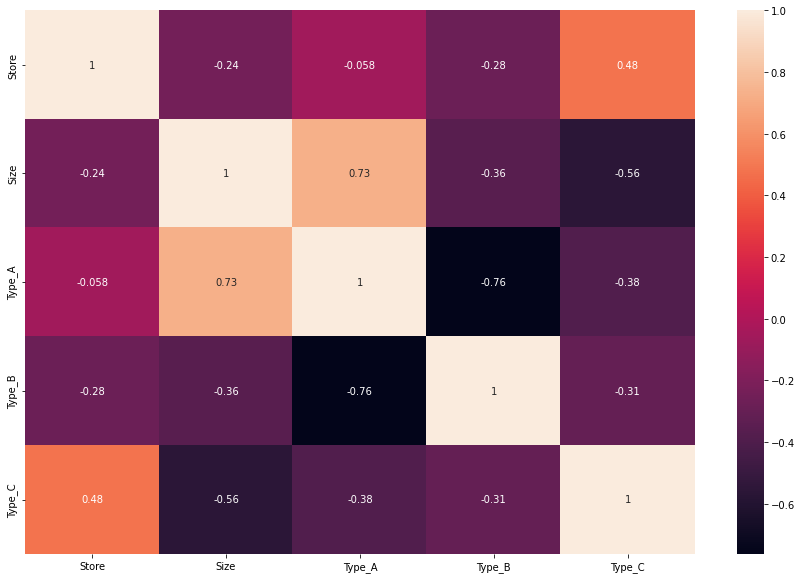

In [20]:
# Using Heatmap to visualize the Correlation.
# Stores dataset
cor = df_stores.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

plt.show()

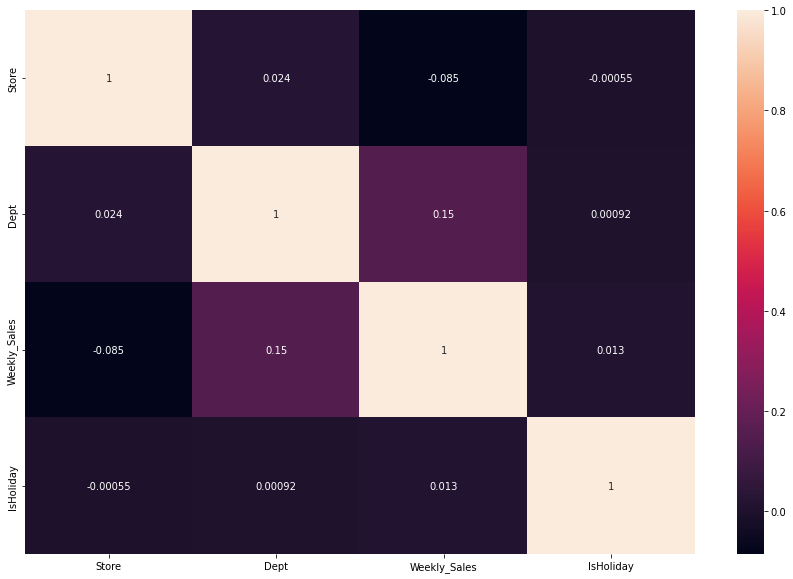

In [21]:
# Sales dataset
cor = sales_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

plt.show()

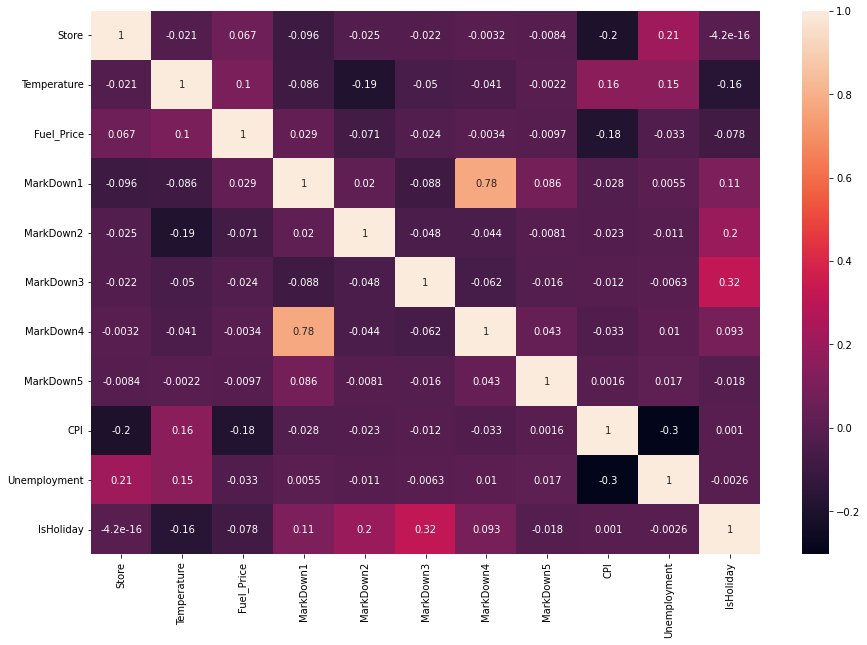

In [22]:
cor = features_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)

plt.show()

## Visualizing Charts 

In [24]:
features_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.096358,8.106,0
1,1,2010-12-02,38.51,2.548,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.242170,8.106,1
2,1,2010-02-19,39.93,2.514,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.289143,8.106,0
3,1,2010-02-26,46.63,2.561,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.319643,8.106,0
4,1,2010-05-03,46.50,2.625,7032.371786,3384.176594,1760.10018,3292.935886,4132.216422,211.350143,8.106,0


In [29]:
features_df['Temperature'].value_counts()

50.43    11
70.28    11
67.87    10
70.87     9
76.03     9
         ..
26.58     1
6.23      1
16.57     1
22.16     1
79.13     1
Name: Temperature, Length: 4178, dtype: int64

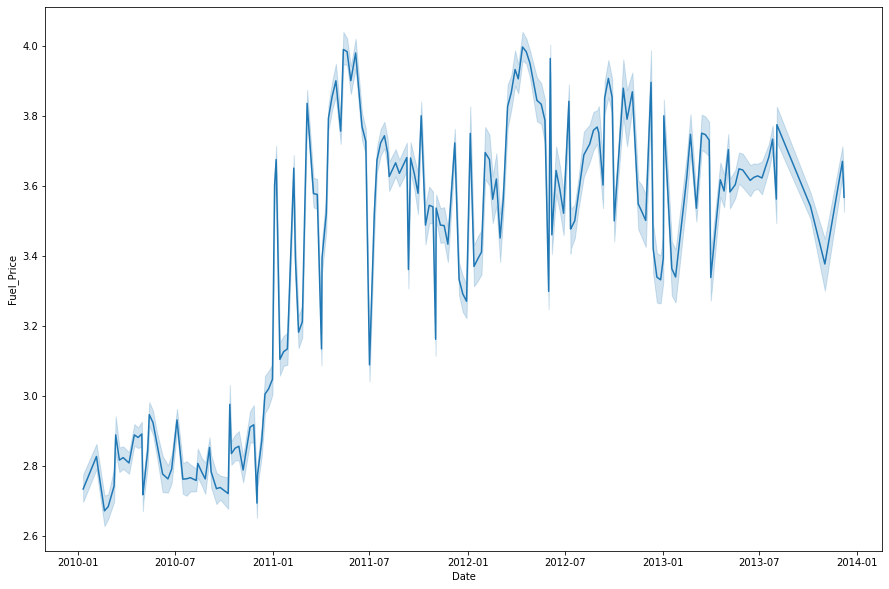

In [45]:
plt.figure(figsize=(15,10))
sns.lineplot(data = features_df, x = 'Date',y = 'Fuel_Price')
plt.show()